# 决策树

In [1]:
import math

# 计算概率为x的随机事件的熵
def h(x):
    if x >= 1 or x <= 0: return 0
    return -x * math.log2(x)

# 计算包含0和1两个类别的数据集的熵
def data_entropy(labels):
    if len(labels) < 1: return 0
    # 计算正样本比例
    p = sum(labels) / len(labels)
    # 计算负样本数量
    n = 1 - p
    return h(p) + h(n)

print(data_entropy([0,0,0,1,1,1]))
# 输出1，表示熵最高，数据集中正负样本参半，纯度低
print(data_entropy([0,1,1,1,1,1]))
# 输出0.65，比上面的数据集要单纯一些
print(data_entropy([0,0,0,0,0,0]))
# 输出0，表示熵最低，最为纯粹的数据集，只包含单一类别的样本


1.0
0.6500224216483541
0


In [2]:
import numpy

# 每一行的5个元素分别表示
# 天气观感（晴、阴、雨），温度，湿度，风力和是否运动
weather_data = numpy.array([[0,0,0,0,0],[0,0,0,1,0],[0,1,0,0,0],
    [0,2,1,0,1],[0,1,1,1,1],[1,0,0,0,1],[1,2,1,1,1],
    [1,1,0,1,1],[1,0,1,0,1],[2,1,0,0,1],[2,2,1,0,1],
    [2,2,1,1,0],[2,1,1,0,1],[2,1,0,1,0]])

# 计算某个划分的熵
# 输入是数据集、划分选取的属性和属性值
# 输出是熵和分割出的两个数据集
def split_entropy(data, property_id, property_value):
    # 选取property_id这一列与property_value进行比较
    left_index = data[:, property_id] == property_value
    right_index = data[:, property_id] != property_value
    # 根据比较结果选取分支两侧的数据子集
    left_data = data[left_index, :]
    right_data = data[right_index, :]
    # 取数据子集的最后一列，即类标签列，计算子集的熵
    left_entropy = data_entropy(left_data[:,-1])
    right_entropy = data_entropy(right_data[:,-1])
    # 计算分割后两个子集的加权平均熵
    split_entropy = (left_data.shape[0] * left_entropy + right_data.shape[0] * right_entropy) / data.shape[0]
    return split_entropy, left_data, right_data

print(split_entropy(weather_data, 0, 0)[0])
# 输出0.838，用天气观感晴作为划分条件，分割得到的两个数据集的平均熵是0.838

0.8380423950607804


In [3]:
# 选择划分的函数
# 输入是数据集，输出是划分后的熵、选取的属性和属性值，划分后的数据子集
def find_split(data):
    min_entropy = None
    best_split_property_id = None
    best_split_property_value = None
    best_split_left = None
    best_split_right = None
    # 枚举有所属性
    for index in range(data.shape[1] - 1):
        # 获取该属性的可能取值
        unique_values = numpy.unique(data[:,index])
        if len(unique_values) < 2: continue
        # 枚举属性可能划分（划分比取值数量少1）
        for value in unique_values[0:-1]:
            entropy, left, right = split_entropy(data, index, value)
            if min_entropy is None or min_entropy > entropy:
                min_entropy = entropy
                best_split_property_id = index
                best_split_property_value = value
                best_split_left = left
                best_split_right = right
    return min_entropy, best_split_property_id, best_split_property_value, best_split_left, best_split_right

split = find_split(weather_data)
print('entropy={0} property_id={1}, property_value={2}'.format(
    split[0], split[1], split[2]))
# 输出：
# entropy=0.714... property_id=0, property_value=1

entropy=0.7142857142857143 property_id=0, property_value=1


In [4]:
# 构造并打印决策树
# 输入参数是数据集和控制缩进用的空白
def build_decision_tree(data, tabspace):
    class_count = len(numpy.unique(data[:,-1]))
    # 如果数据集包含不同类别，就进行划分
    if class_count > 1:
        split = find_split(data)
    else:
        split = [None]
    # 如果无法划分，则到达决策树的叶节点
    if split[0] is None:
        print('{0}class={1}'.format(tabspace, data[0,-1]))
        return
    # 如果划分成功，递归的划分左右子树
    print('{0}property{1} value={2}'.format(tabspace, split[1], split[2]))
    build_decision_tree(split[3], tabspace + '  ')
    build_decision_tree(split[4], tabspace + '  ')

build_decision_tree(weather_data, '')

property0 value=1
  class=1
  property2 value=0
    property0 value=0
      class=0
      property3 value=0
        class=1
        class=0
    property3 value=0
      class=1
      property0 value=0
        class=1
        class=0


[0]


[Text(148.8, 195.696, 'X[2] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(74.4, 152.208, 'X[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(37.2, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(111.60000000000001, 108.72, 'X[0] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(74.4, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(148.8, 65.232, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(186.0, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 152.208, 'X[3] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(186.0, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(260.40000000000003, 108.72, 'X[0] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(223.20000000000002, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(297.6, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

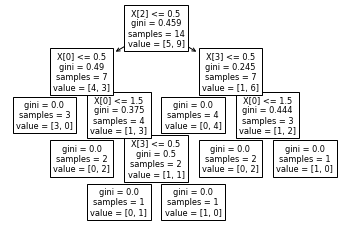

In [9]:
from sklearn import tree
from IPython.display import display

X = weather_data[:,0:-1]
Y = weather_data[:,-1]
clf = tree.DecisionTreeClassifier()
# 用数据构造决策树
clf.fit(X, Y)

# 用决策树进行分类
result = clf.predict([[0,0,0,0]])
print(result)
# 输出：[0] 表示不适合运动

# 将决策树的结构可视化
tree.plot_tree(clf)